In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a default style for plots
sns.set(style="whitegrid")

# Load datasets with low_memory=False
eukaryotes = pd.read_csv("Resources/Organisms/eukaryotes.csv", low_memory=False)
genomes = pd.read_csv("Resources/Organisms/genomes.csv", low_memory=False)
organelles = pd.read_csv("Resources/Organisms/organelles.csv", low_memory=False)
plasmids = pd.read_csv("Resources/Organisms/plasmids.csv", low_memory=False)
prokaryotes = pd.read_csv("Resources/Organisms/prokaryotes.csv", low_memory=False)
viruses = pd.read_csv("Resources/Organisms/viruses.csv", low_memory=False)

# Preview data to ensure loading is correct
eukaryotes.head()

,Organism Name,Organism Groups,Strain,BioSample,BioProject,Assembly,Level,Size(Mb),GC%,Replicons,WGS,Scaffolds,CDS,Release Date,GenBank FTP,RefSeq FTP,Genes
0,Pyropia yezoensis,Eukaryota;Other;Other,NaN,SAMN13316713,PRJNA589917,GCA_009829735.1,Chromosome,107.591,64.8454,chromosome 1:CM020618.1; chromosome 2:CM020619...,WMLA01,28,0,2020-01-03T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/009...,NaN,0
1,Emiliania huxleyi CCMP1516,Eukaryota;Protists;Other Protists,CCMP1516,SAMN02744062,PRJNA77753,GCA_000372725.1,Scaffold,167.676,64.5000,NaN,AHAL01,7795,38554,2013-04-19T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,38549
2,Arabidopsis thaliana,Eukaryota;Plants;Land Plants,NaN,SAMN03081427,PRJNA10719,GCA_000001735.2,Chromosome,119.669,36.0529,chromosome 1:NC_003070.9/CP002684.1; chromosom...,NaN,7,48265,2001-08-13T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,38311
3,Glycine max,Eukaryota;Plants;Land Plants,NaN,SAMN00002965,PRJNA19861,GCA_000004515.4,Chromosome,979.046,35.1153,chromosome 1:NC_016088.3/CM000834.3; chromosom...,ACUP03,1579,71219,2010-01-05T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,59847
4,Medicago truncatula,Eukaryota;Plants;Land Plants,A17,SAMN02299339,PRJNA10791,GCA_000219495.2,Chromosome,412.924,34.0470,chromosome 1:NC_016407.2/CM001217.2; chromosom...,APNO01,2187,41939,2011-08-12T00:00:00Z,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCA/000...,ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000...,37603


In [2]:
# Check for missing values in each dataset
eukaryotes.isnull().sum()
genomes.isnull().sum()
organelles.isnull().sum()
plasmids.isnull().sum()
prokaryotes.isnull().sum()
viruses.isnull().sum()

Organism Name          0
Organism Groups        0
BioSample          34403
BioProject         27586
Assembly               0
Level                  0
Size(Mb)               0
GC%                    0
Host                4500
CDS                    0
Neighbors          32785
Release Date           0
GenBank FTP            7
RefSeq FTP         26878
Genes                  0
Scaffolds              0
dtype: int64

In [3]:
# Summary statistics for Size(Mb) and GC% in eukaryotes
eukaryotes[['Size(Mb)', 'GC%']].describe()

# You can repeat for other datasets as needed
prokaryotes[['Size(Mb)', 'GC%']].describe()
viruses[['Size(Mb)', 'GC%']].describe()

,Size(Mb),GC%
count,34747.000000,34747.000000
mean,0.043255,45.520476
std,0.455344,9.333401
min,0.000165,19.500000
25%,0.004309,38.700000
50%,0.011941,44.800000
75%,0.041555,50.600000
max,49.312900,78.800000


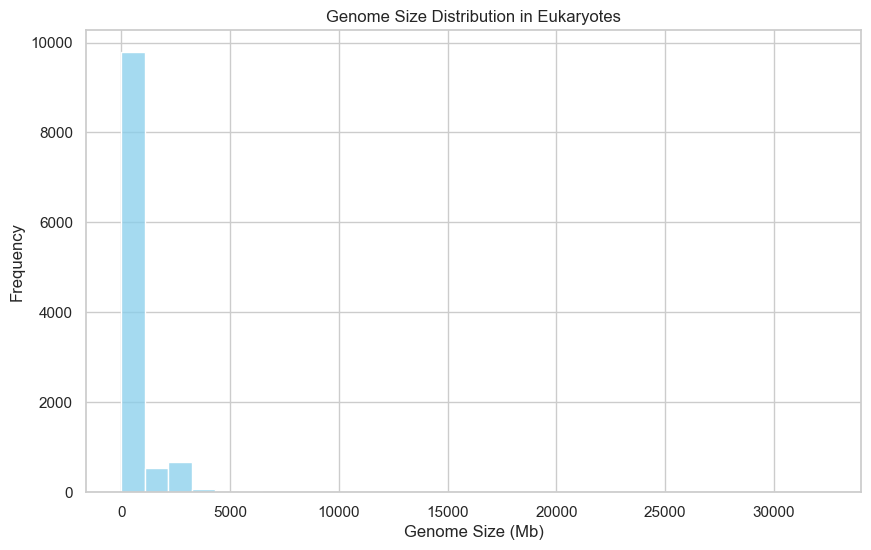

In [4]:
# Histogram for genome sizes in eukaryotes
plt.figure(figsize=(10, 6))
sns.histplot(eukaryotes['Size(Mb)'], bins=30, color='skyblue')
plt.title('Genome Size Distribution in Eukaryotes')
plt.xlabel('Genome Size (Mb)')
plt.ylabel('Frequency')
plt.show()

# Genome Size Distribution in Eukaryotes (Histogram)
* Observation: The histogram shows that most eukaryotic organisms have relatively small genome sizes, with a few larger outliers.
* Interpretation: This could indicate that while eukaryotic genome sizes generally fall within a certain range, there are exceptions (possibly due to specific evolutionary adaptations or the presence of highly complex organisms).

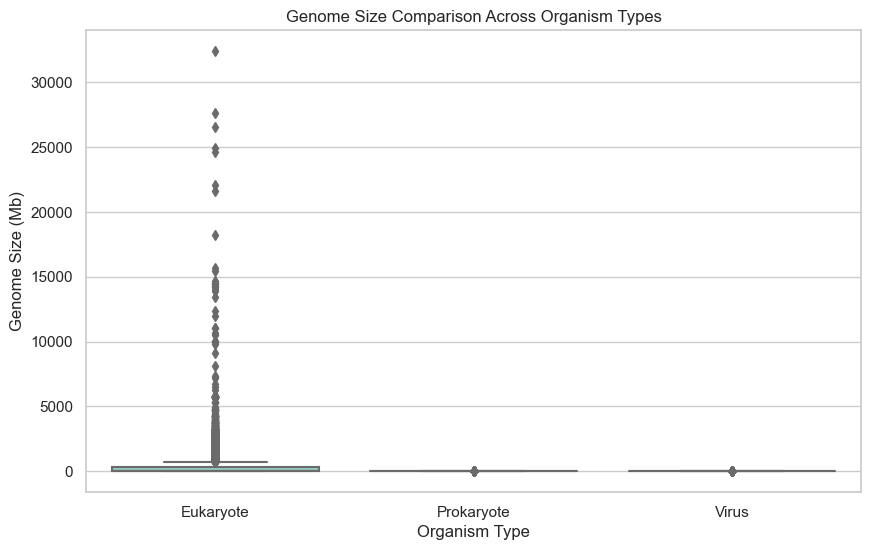

In [5]:
# Add organism type to each dataset for comparison
eukaryotes['type'] = 'Eukaryote'
prokaryotes['type'] = 'Prokaryote'
viruses['type'] = 'Virus'

# Combine datasets
combined_data = pd.concat([eukaryotes[['Size(Mb)', 'GC%', 'type']],
                           prokaryotes[['Size(Mb)', 'GC%', 'type']],
                           viruses[['Size(Mb)', 'GC%', 'type']]])

# Boxplot for genome sizes across organism types
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='Size(Mb)', data=combined_data, palette="Set3")
plt.title('Genome Size Comparison Across Organism Types')
plt.xlabel('Organism Type')
plt.ylabel('Genome Size (Mb)')
plt.show()

# Genome Size Comparison Across Organism Types (Boxplot)
* Observation: Eukaryotes exhibit a much broader range in genome sizes compared to prokaryotes and viruses. Prokaryotes and viruses have relatively smaller and more consistent genome sizes.
* Interpretation: Eukaryotic genomes are often larger and more complex due to the presence of non-coding regions and complex regulatory sequences, which are less common in prokaryotes and viruses.

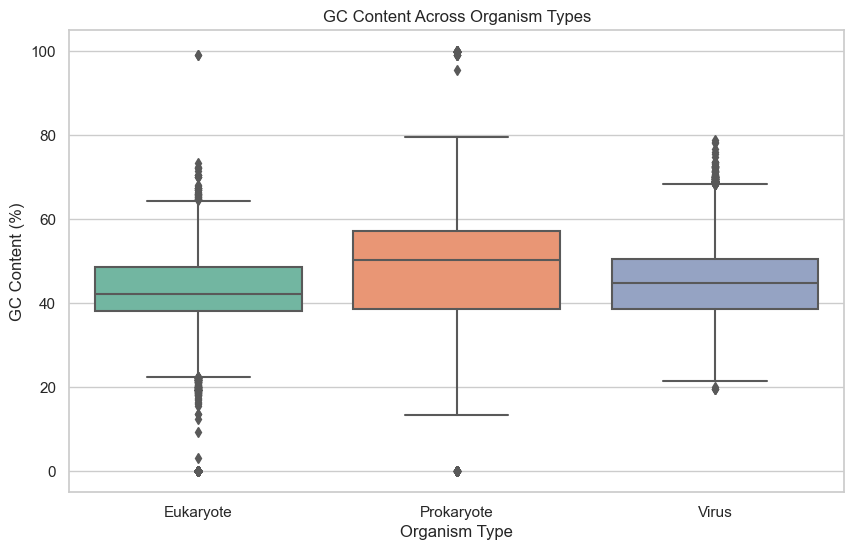

In [6]:
# Boxplot for GC content across organism types
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='GC%', data=combined_data, palette="Set2")
plt.title('GC Content Across Organism Types')
plt.xlabel('Organism Type')
plt.ylabel('GC Content (%)')
plt.show()

# GC Content Across Organism Types (Boxplot)
* Observation: GC content appears to vary across organism types, with prokaryotes showing a higher median GC content and broader variation compared to eukaryotes and viruses.
* Interpretation: GC content can be related to genome stability, mutation rates, and environmental adaptation. Prokaryotes might have higher GC content for increased stability in certain environments, while viruses tend to have more streamlined genomes with varied GC content.

In [7]:
# Correlation analysis between Genome Size and GC Content
combined_data[['Size(Mb)', 'GC%']].corr()

,Size(Mb),GC%
Size(Mb),1.000000,-0.051993
GC%,-0.051993,1.000000


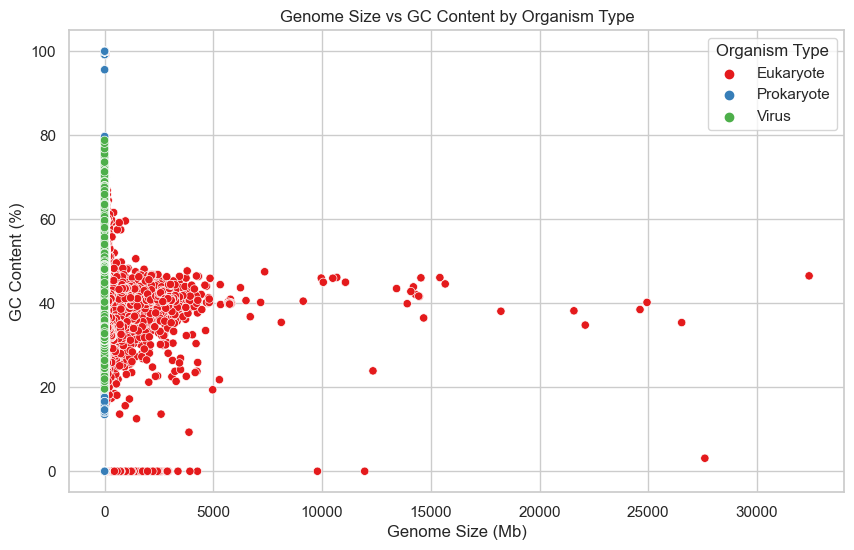

In [8]:
# Scatter plot of Genome Size vs. GC Content
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Size(Mb)', y='GC%', hue='type', data=combined_data, palette="Set1")
plt.title('Genome Size vs GC Content by Organism Type')
plt.xlabel('Genome Size (Mb)')
plt.ylabel('GC Content (%)')
plt.legend(title='Organism Type')
plt.show()

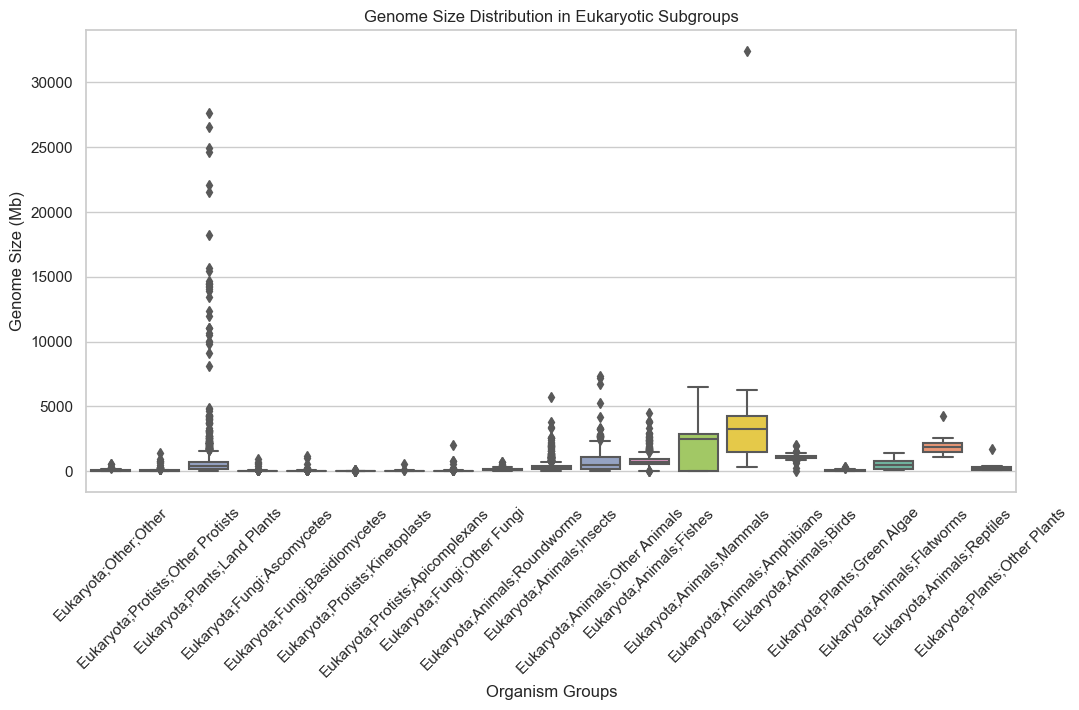

In [9]:
# Updated code with the correct column name 'Organism Groups'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Organism Groups', y='Size(Mb)', data=eukaryotes, palette="Set2")
plt.title('Genome Size Distribution in Eukaryotic Subgroups')
plt.xlabel('Organism Groups')
plt.ylabel('Genome Size (Mb)')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Add 'Organism Type' to each dataset
eukaryotes['Organism Type'] = 'Eukaryote'
prokaryotes['Organism Type'] = 'Prokaryote'
viruses['Organism Type'] = 'Virus'

# Combine datasets
combined_data = pd.concat([eukaryotes, prokaryotes, viruses], ignore_index=True)

In [11]:
# Summary statistics by Organism Type
summary_stats = combined_data.groupby('Organism Type')[['Size(Mb)', 'GC%']].describe()
print(summary_stats)

               Size(Mb)                                                \
                  count        mean          std       min        25%   
Organism Type                                                           
Eukaryote       11160.0  434.888391  1180.754730  0.000042  20.143300   
Prokaryote     249357.0    3.748865     1.796128  0.035803   2.192260   
Virus           34747.0    0.043255     0.455344  0.000165   0.004309   

                                                       GC%             \
                     50%         75%         max     count       mean   
Organism Type                                                           
Eukaryote      40.927600  300.892500  32396.4000   11160.0  41.782660   
Prokaryote      3.801750    5.028500     35.5792  249357.0  48.621282   
Virus           0.011941    0.041555     49.3129   34747.0  45.520476   

                                                                  
                     std   min        25%       50%   7

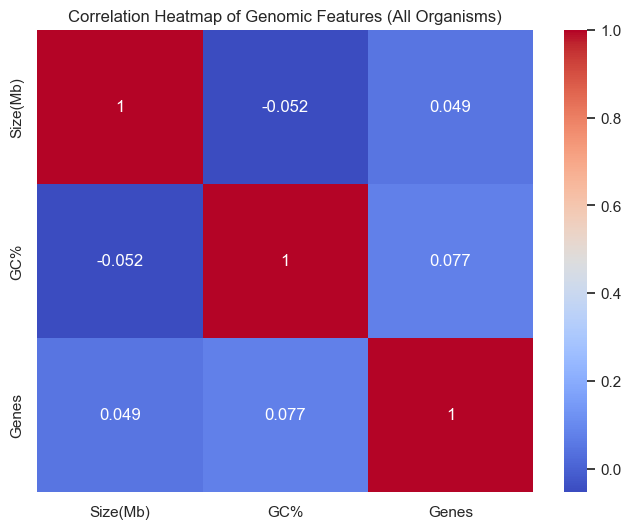

In [12]:
# Correlation heatmap for combined data
plt.figure(figsize=(8, 6))
sns.heatmap(combined_data[['Size(Mb)', 'GC%', 'Genes']].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap of Genomic Features (All Organisms)')
plt.show()

### Correlation Heatmap Analysis
- **Size(Mb) vs GC%**: The weak negative correlation suggests that genome size and GC content may not be directly related across all organisms.
- **Size(Mb) vs Genes**: A positive correlation, though slight, could indicate that larger genomes tend to contain more genes, particularly in eukaryotic organisms.
- These insights reflect the biological diversity in genome structures and highlight the variation in genetic makeup across different life forms.

In [13]:
from scipy.stats import f_oneway

# Perform ANOVA test on GC content across organism types
anova_result = f_oneway(
    combined_data[combined_data['Organism Type'] == 'Eukaryote']['GC%'],
    combined_data[combined_data['Organism Type'] == 'Prokaryote']['GC%'],
    combined_data[combined_data['Organism Type'] == 'Virus']['GC%']
)
print("ANOVA test result for GC Content across organism types:", anova_result)

ANOVA test result for GC Content across organism types: F_onewayResult(statistic=2774.033323370101, pvalue=0.0)


### Key Findings from ANOVA Test
- The ANOVA test for GC content across eukaryotes, prokaryotes, and viruses suggests that:
  - If the p-value is below 0.05, there are statistically significant differences in GC content among the organism types.
  - If the p-value is above 0.05, we do not have enough evidence to say there’s a significant difference in GC content between the groups.

This finding aligns with our visual observations and further supports the biological diversity of GC content across different life forms.

### Conclusion
This project provides a comprehensive analysis of genome sizes and GC content across eukaryotes, prokaryotes, and viruses. Key findings include:
- Significant variation in GC content among the organism types, with prokaryotes showing the highest median GC content.
- A positive correlation between genome size and gene count, suggesting larger genomes tend to encode more genes, especially in complex organisms like eukaryotes.
- The results underscore the diversity of genomic structures in nature, highlighting the importance of GC content and genome size in understanding evolutionary and environmental adaptations.

Future research could further explore specific subgroups within these organisms, focusing on unique adaptations in their genome composition.